# <u>Capstone project - Gilled Mushroom Classification</u>

By: Jason Robathan

### Dataset description

This dataset includes descriptions of hypothetical samples corresponding to 23 species of gilled mushrooms in the Agaricus and Lepiota Family Mushroom drawn from The Audubon Society Field Guide to North American Mushrooms (1981). Each species is identified as definitely edible, definitely poisonous, or of unknown edibility and not recommended. This latter class was combined with the poisonous one. The Guide clearly states that there is no simple rule for determining the edibility of a mushroom; no rule like "leaflets three, let it be'' for Poisonous Oak and Ivy.

Time period: Donated to UCI ML 27 April 1987

### Some facts about mushrooms

Mushrooms have been used for years in various culinary applications as an accompaniment to other ingredients or as the star of a dish themselves. In more recent years certain species of mushrooms have been studied for their therapeutic applications and are proving effective in the treatment of PTSD and depression (see MAPS studies). Although these fungi can have powerful effects they can also be incredibly dangerous to consume, leading to sickness or death in some cases. The recent increase in the knowledge of the power of mushrooms has lead more people to forage their own mushrooms which can lead to dangerous outcomes if not identifies properly!

While some people might think that mushrooms are plants, they are in fact neither plants nor animals; they live in their own class called fungi. They can surely look plant-like but a key difference is that they do not contain chlorophyll like plants do, so instead of harnessing energy from the sun to produce food they rely on extracting nutrients from their environment. The cap and stem of a mushroom make up the fruiting body (the reproductive structure) that releases spores into the environment. A significant portion of mushrooms produce these spores underneath their cap in structures called "gills" which actually look similar to the gills of a fish. The fruiting body is the structure we can most easily see above ground but there is much more to fungi that lives under the surface in the mycelium. For the purpose of this project we are looking at 23 different species of gilled mushrooms, both poisonous and safe to eat, and their various features.

### General tips for mushroom identification relating to toxicity:
In general when trying to identify if a mushroom is poisonous or edible it is recommended to avoid eating those with particular features: "Avoid mushrooms with white gills, a skirt or ring on the stem, a bulbous or sack like base...or red on the cap or stem" (https://www.wildfooduk.com/articles/how-to-tell-the-difference-between-poisonous-and-edible-mushrooms/)

![](Anatomy3.jpg)

#### Explaining the different mushroom features:

'Gills' are on the underside of the cap and other mushrooms can have pores or teeth instead of gills

'Stalk' is another word for the 'stipe' or 'stem' of the mushroom

The 'veil' is a thin membrane in immature mushrooms that typically surrounds the cap and stem

The 'ring' is the skirt-looking structure located on the stalk or stem of the mushroom that remains after the veil is shed from the immature mushroom

'Spores' are the reproductive cells of a mushroom and are often used to make 'spore prints' on paper to for the purpose of identification or art!

![](spore-print.jpg)

### Data question

I want to determine if there are certain features of these 23 species of gilled mushrooms that strongly predict if they are poisonous or safe to eat. This knowledge can help mushroom foragers and consumers more accurately determine the risk of eating a specific mushroom and can potentially save lives.

In [1]:
#import data transformation and visualization libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
#import encoders
import sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
#import models
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
#import evaluation functions
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, accuracy_score
from sklearn.model_selection import cross_val_score
#import scikitlearn plotting libraries
import graphviz
import scikitplot as skplt
from mlxtend.plotting import plot_decision_regions
from mlxtend.plotting import category_scatter

In [2]:
df = pd.read_csv('mushrooms-fullnames.csv') #read file to dataframe

In [3]:
pd.set_option('display.max_columns', None) #show all columns
df.head(5)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,Poisonous,Convex,Smooth,Brown,Bruises,Pungent,Free,Close,Narrow,Black,Enlarging,Equal,Smooth,Smooth,White,White,Partial,White,One,Pendant,Black,Scattered,Urban
1,Edible,Convex,Smooth,Yellow,Bruises,Almond,Free,Close,Broad,Black,Enlarging,Club,Smooth,Smooth,White,White,Partial,White,One,Pendant,Brown,Numerous,Grasses
2,Edible,Bell,Smooth,White,Bruises,Anise,Free,Close,Broad,Brown,Enlarging,Club,Smooth,Smooth,White,White,Partial,White,One,Pendant,Brown,Numerous,Meadows
3,Poisonous,Convex,Scaly,White,Bruises,Pungent,Free,Close,Narrow,Brown,Enlarging,Equal,Smooth,Smooth,White,White,Partial,White,One,Pendant,Black,Scattered,Urban
4,Edible,Convex,Smooth,Green,No Bruises,None,Free,Crowded,Broad,Black,Tapering,Equal,Smooth,Smooth,White,White,Partial,White,One,Evanescent,Brown,Abundant,Grasses


## <u>Data Overview and Cleaning</u>

In [4]:
df.shape #determining the number of rows and columns in the dataset

(8124, 23)

##### The dataset has 8124 rows, one for each mushroom, and 23 columns each pertaining to a different feature of the mushroom

In [5]:
df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,9,2,9,2,2,2,12,2,5,4,4,9,9,1,4,3,5,9,6,7
top,Edible,Convex,Scaly,Brown,No Bruises,None,Free,Close,Broad,Buff,Tapering,Bulbous,Smooth,Smooth,White,White,Partial,White,One,Pendant,White,Several,Wood
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,4608,3776,5176,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


##### We can see that each column has the expected 8124 values seen previously in the shape of the dataframe
##### About half of the mushrooms are Edible while the other half are Poisonous
##### The number of unique values per column varies from 1 to 12.  All of the mushrooms in this dataset have a partial veil for their 'veil-type'. 'gill-color' is the column with the largest number of unique values at 12.
##### The most common value per column  and how often that value appears in the column. The following columns have over 75% (>6093) of their values as a single value:  'gill-attachment':Free, 'gill-spacing':Close, 'veil-type':Partial, 'veil-color':White, and 'ring-number':One.

In [6]:
# Now that we know what the most common values are, what are all of the unique 
# values in each column of the dataset?
for col in df:
    print(col)
    print(df[col].unique())

class
['Poisonous' 'Edible']
cap-shape
['Convex' 'Bell' 'Sunken' 'Flat' 'Knobbed' 'c']
cap-surface
['Smooth' 'Scaly' 'Fibrous' 'Grooves']
cap-color
['Brown' 'Yellow' 'White' 'Green' 'Red' 'Pink' 'Buff' 'Purple' 'Cinnamon']
bruises
['Bruises' 'No Bruises']
odor
['Pungent' 'Almond' 'Anise' 'None' 'Foul' 'Creosote' 'Fishy' 'Spicy'
 'Musty']
gill-attachment
['Free' 'Attached']
gill-spacing
['Close' 'Crowded']
gill-size
['Narrow' 'Broad']
gill-color
['Black' 'Brown' 'Gray' 'Pink' 'White' 'Chocolate' 'Purple' 'Red' 'Buff'
 'Green' 'Yellow' 'Orange']
stalk-shape
['Enlarging' 'Tapering']
stalk-root
['Equal' 'Club' 'Bulbous' 'Rooted' '?']
stalk-surface-above-ring
['Smooth' 'Fibrous' 'Silky' 'Scaly']
stalk-surface-below-ring
['Smooth' 'Fibrous' 'Scaly' 'Silky']
stalk-color-above-ring
['White' 'Gray' 'Pink' 'Brown' 'Buff' 'Red' 'Orange' 'Cinnamon' 'Yellow']
stalk-color-below-ring
['White' 'Pink' 'Gray' 'Buff' 'Brown' 'Red' 'Yellow' 'Orange' 'Cinnamon']
veil-type
['Partial']
veil-color
['White' 'B

##### Each column is a category that has one or more strings as its potential values
##### There don't appear to be any spelling errors in any of the values
##### Strange values: 
cap-shape has a 'c' value,

stalk-root has a '?' value,
##### Strange color: 
'buff' is a light brownish color



In [7]:
# What datatypes are we dealing with and do we have any null values?

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

##### All columns are of the 'object' datatype meaning we're dealing with string values and we don't have any null values.

In [8]:
#How many cap-shape have the 'c' value?

pd.value_counts(df['cap-shape'])

Convex     3656
Flat       3152
Knobbed     828
Bell        452
Sunken       32
c             4
Name: cap-shape, dtype: int64

##### There are 4 entries with the 'c' value. Looking at the metadata this 'c' corresponds to 'conical' shape. Let's change these entries to their proper name.

In [9]:
# Let's change these four 'c' values to 'conical' to make our data more consistent

df1 = df.copy() #make a copy of the dataframe to preserve the original while we make changes
df1['cap-shape'] = df1['cap-shape'].str.replace('c', 'Conical')
pd.value_counts(df1['cap-shape'])

Convex     3656
Flat       3152
Knobbed     828
Bell        452
Sunken       32
Conical       4
Name: cap-shape, dtype: int64

In [10]:
#How many stalk-root have the '?' value?

pd.value_counts(df['stalk-root'])

Bulbous    3776
?          2480
Equal      1120
Club        556
Rooted      192
Name: stalk-root, dtype: int64

##### Wow! There are 2480 out of 8124 (30.5%) entries with a '?' value for stalk-root. The metadata says '?' is simply a missing value. Perhaps the root was damaged when extracting the mushroom and therefore could not be used for classification purposes. Let's change the '?' to 'Unknown' to be a bit more descriptive.

In [11]:
#Changing '?' values to 'Unknown' in the stalk-root column
df1['stalk-root'] = df1['stalk-root'].str.replace('?', 'Unknown') #using df1 to keep the original dataframe in tact
pd.value_counts(df1['stalk-root'])

<ipython-input-11-2ac6ca52b420>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  df1['stalk-root'] = df1['stalk-root'].str.replace('?', 'Unknown') #using df1 to keep the original dataframe in tact


Bulbous    3776
Unknown    2480
Equal      1120
Club        556
Rooted      192
Name: stalk-root, dtype: int64

## <u>Exploratory Data Analysis</u>

### Correlation Analysis of the variables

In [59]:
# Creating a dataframe with all encoded values 
df3 = pd.concat([df2['class'], df2_independent_vars_enc], axis=1, join='inner')
df3

,class,cap-shape_Bell,cap-shape_Conical,cap-shape_Convex,cap-shape_Flat,cap-shape_Knobbed,cap-shape_Sunken,cap-surface_Fibrous,cap-surface_Grooves,cap-surface_Scaly,cap-surface_Smooth,cap-color_Brown,cap-color_Buff,cap-color_Cinnamon,cap-color_Green,cap-color_Pink,cap-color_Purple,cap-color_Red,cap-color_White,cap-color_Yellow,bruises_Bruises,bruises_No Bruises,odor_Almond,odor_Anise,odor_Creosote,odor_Fishy,odor_Foul,odor_Musty,odor_None,odor_Pungent,odor_Spicy,gill-attachment_Attached,gill-attachment_Free,gill-spacing_Close,gill-spacing_Crowded,gill-size_Broad,gill-size_Narrow,gill-color_Black,gill-color_Brown,gill-color_Buff,gill-color_Chocolate,gill-color_Gray,gill-color_Green,gill-color_Orange,gill-color_Pink,gill-color_Purple,gill-color_Red,gill-color_White,gill-color_Yellow,stalk-shape_Enlarging,stalk-shape_Tapering,stalk-root_Bulbous,stalk-root_Club,stalk-root_Equal,stalk-root_Rooted,stalk-root_Unknown,stalk-surface-above-ring_Fibrous,stalk-surface-above-ring_Scaly,stalk-surface-above-ring_Silky,stalk-surface-above-ring_Smooth,stalk-surface-below-ring_Fibrous,stalk-surface-below-ring_Scaly,stalk-surface-below-ring_Silky,stalk-surface-below-ring_Smooth,stalk-color-above-ring_Brown,stalk-color-above-ring_Buff,stalk-color-above-ring_Cinnamon,stalk-color-above-ring_Gray,stalk-color-above-ring_Orange,stalk-color-above-ring_Pink,stalk-color-above-ring_Red,stalk-color-above-ring_White,stalk-color-above-ring_Yellow,stalk-color-below-ring_Brown,stalk-color-below-ring_Buff,stalk-color-below-ring_Cinnamon,stalk-color-below-ring_Gray,stalk-color-below-ring_Orange,stalk-color-below-ring_Pink,stalk-color-below-ring_Red,stalk-color-below-ring_White,stalk-color-below-ring_Yellow,veil-type_Partial,veil-color_Brown,veil-color_Orange,veil-color_White,veil-color_Yellow,ring-number_None,ring-number_One,ring-number_Two,ring-type_Evanescent,ring-type_Flaring,ring-type_Large,ring-type_None,ring-type_Pendant,spore-print-color_Black,spore-print-color_Brown,spore-print-color_Buff,spore-print-color_Chocolate,spore-print-color_Green,spore-print-color_Orange,spore-print-color_Purple,spore-print-color_White,spore-print-color_Yellow,population_Abundant,population_Clustered,population_Numerous,population_Scattered,population_Several,population_Solitary,habitat_Grasses,habitat_Leaves,habitat_Meadows,habitat_Paths,habitat_Urban,habitat_Waste,habitat_Wood
0,1,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,1,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
3,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
4,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,..

<AxesSubplot:>

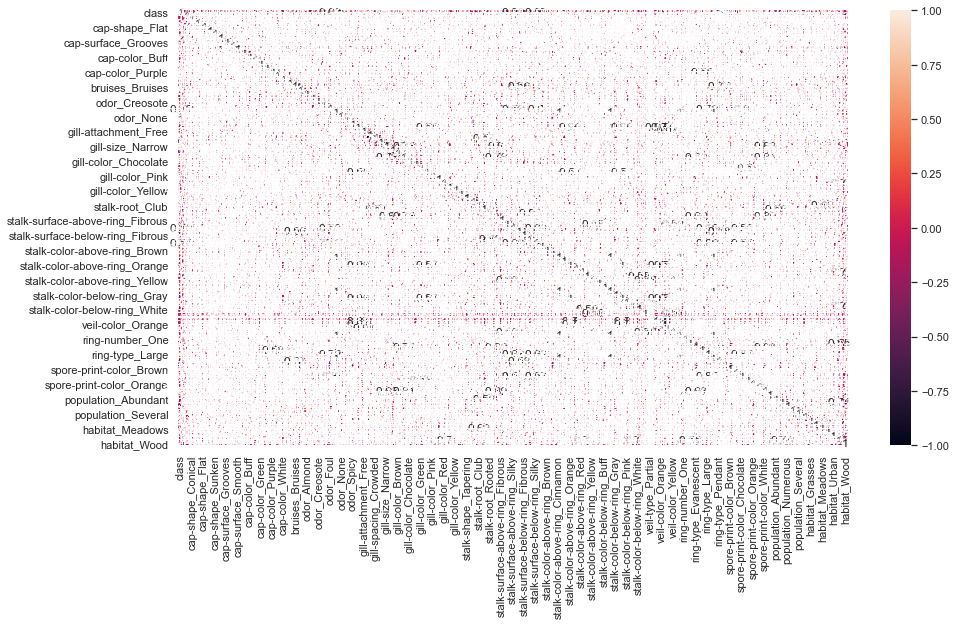

In [62]:
# correlation analysis
correlationanalysis = df3.corr()

# Resizing trick from matplotlib
plt.figure(figsize=(15,8))

# setting the annot argument to "True" to display labels
sns.heatmap(correlationanalysis,annot=True)

#### This correlation heatmap is huge and very hard to interpret! First let's plot the correlations to 'class' with a bar plot and afterwards let's make another heatmap using the entire features before breaking them out by value for easier readability.

<AxesSubplot:>

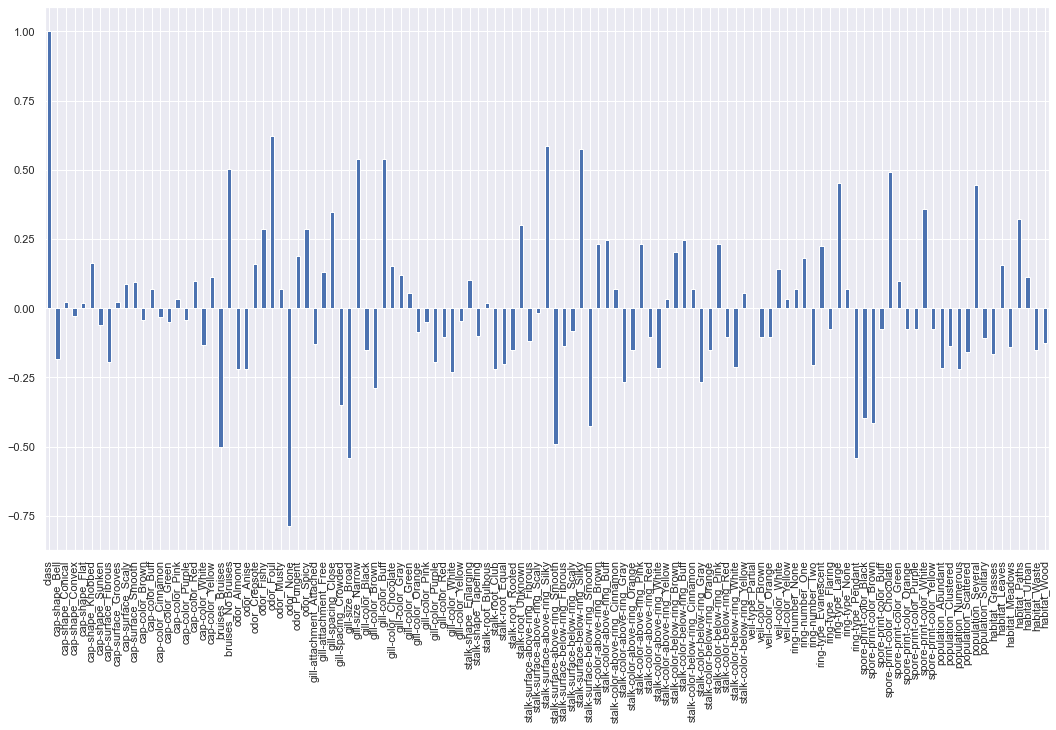

In [224]:
#Making a bar plot for the correlation variables related to 'class'
df3.corr()['class'].plot(kind='bar', figsize=(18,10))

In [223]:
df3.corr().iloc[0:1,:] #grab the 'class' correlation row

,class,cap-shape_Bell,cap-shape_Conical,cap-shape_Convex,cap-shape_Flat,cap-shape_Knobbed,cap-shape_Sunken,cap-surface_Fibrous,cap-surface_Grooves,cap-surface_Scaly,cap-surface_Smooth,cap-color_Brown,cap-color_Buff,cap-color_Cinnamon,cap-color_Green,cap-color_Pink,cap-color_Purple,cap-color_Red,cap-color_White,cap-color_Yellow,bruises_Bruises,bruises_No Bruises,odor_Almond,odor_Anise,odor_Creosote,odor_Fishy,odor_Foul,odor_Musty,odor_None,odor_Pungent,odor_Spicy,gill-attachment_Attached,gill-attachment_Free,gill-spacing_Close,gill-spacing_Crowded,gill-size_Broad,gill-size_Narrow,gill-color_Black,gill-color_Brown,gill-color_Buff,gill-color_Chocolate,gill-color_Gray,gill-color_Green,gill-color_Orange,gill-color_Pink,gill-color_Purple,gill-color_Red,gill-color_White,gill-color_Yellow,stalk-shape_Enlarging,stalk-shape_Tapering,stalk-root_Bulbous,stalk-root_Club,stalk-root_Equal,stalk-root_Rooted,stalk-root_Unknown,stalk-surface-above-ring_Fibrous,stalk-surface-above-ring_Scaly,stalk-surface-above-ring_Silky,stalk-surface-above-ring_Smooth,stalk-surface-below-ring_Fibrous,stalk-surface-below-ring_Scaly,stalk-surface-below-ring_Silky,stalk-surface-below-ring_Smooth,stalk-color-above-ring_Brown,stalk-color-above-ring_Buff,stalk-color-above-ring_Cinnamon,stalk-color-above-ring_Gray,stalk-color-above-ring_Orange,stalk-color-above-ring_Pink,stalk-color-above-ring_Red,stalk-color-above-ring_White,stalk-color-above-ring_Yellow,stalk-color-below-ring_Brown,stalk-color-below-ring_Buff,stalk-color-below-ring_Cinnamon,stalk-color-below-ring_Gray,stalk-color-below-ring_Orange,stalk-color-below-ring_Pink,stalk-color-below-ring_Red,stalk-color-below-ring_White,stalk-color-below-ring_Yellow,veil-type_Partial,veil-color_Brown,veil-color_Orange,veil-color_White,veil-color_Yellow,ring-number_None,ring-number_One,ring-number_Two,ring-type_Evanescent,ring-type_Flaring,ring-type_Large,ring-type_None,ring-type_Pendant,spore-print-color_Black,spore-print-color_Brown,spore-print-color_Buff,spore-print-color_Chocolate,spore-print-color_Green,spore-print-color_Orange,spore-print-color_Purple,spore-print-color_White,spore-print-color_Yellow,population_Abundant,population_Clustered,population_Numerous,population_Scattered,population_Several,population_Solitary,habitat_Grasses,habitat_Leaves,habitat_Meadows,habitat_Paths,habitat_Urban,habitat_Waste,habitat_Wood
class,1.0,-0.182567,0.023007,-0.026886,0.018526,0.163565,-0.060664,-0.195415,0.023007,0.088677,0.095454,-0.04436,0.067544,-0.03091,-0.050839,0.034702,-0.042854,0.097112,-0.133683,0.113014,-0.50153,0.50153,-0.219529,-0.219529,0.161278,0.28636,0.623842,0.069159,-0.785557,0.186984,0.28636,-0.1292,0.1292,0.348387,-0.348387,-0.540024,0.540024,-0.149641,-0.288943,0.538808,0.150694,0.120285,0.056426,-0.085962,-0.05038,-0.195359,-0.105491,-0.231316,-0.046828,0.102019,-0.102019,0.017712,-0.218548,-0.202839,-0.150087,0.302001,-0.119503,-0.016198,0.587658,-0.491314,-0.136782,-0.081674,0.573524,-0.425444,0.233164,0.245662,0.069159,-0.266489,-0.150087,0.230277,-0.105491,-0.21774,0.032545,0.203966,0.245662,0.069159,-0.266489,-0.150087,0.230277,-0.105491,-0.214112,0.056426,NaN,-0.105491,-0.105491,0.140541,0.032545,0.069159,0.182101,-0.2046,0.223286,-0.074371,0.451619,0.069159,-0.540469,-0.396832,-0.416645,-0.074371,0.490229,0.098024,-0.074371,-0.074371,0.357384,-0.074371,-0.214871,-0.137645,-0.219529,-0.159572,0.443722,-0.107055,-0.165004,0.15515,-0.138627,0.323346,0.112078,-0.150087,-0.126123


### Strongest positively correlated features to 'class', ie. predicting poisonous (in descending order):
odor_Foul (0.623842),  
stalk-surface-above-ring_Silky (0.587658),  
stalk-surface-below-ring_Silky (0.573524),  
gill-size_Narrow (0.540024),  
gill-color_Buff (0.538808),  
bruises_No Bruises (0.50153),    
spore-print-color_Chocolate (0.490229),  
ring-type_Large (0.451619),       
population_Several (0.443722),  
spore-print-color_White (0.357384),  
habitat_Paths (0.323346) 


### Strongest negatively correlated features to 'class', ie. predicting edible (in descending order):
odor_None (-0.785557),  
ring-type_Pendant (-0.540469),  
gill-size_Broad (-0.540024),  
bruises_Bruises (-0.50153),  
stalk-surface-above-ring_Smooth (-0.491314),  
stalk-surface-below-ring_Smooth (-0.425444),  
spore-print-color_Brown (-0.416645),  
spore-print-color_Black (-0.396832)


In [206]:
df4 = df1.copy() #make a copy of df1 which has all features before doing any encoding
df4.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,Poisonous,Convex,Smooth,Brown,Bruises,Pungent,Free,Close,Narrow,Black,Enlarging,Equal,Smooth,Smooth,White,White,Partial,White,One,Pendant,Black,Scattered,Urban
1,Edible,Convex,Smooth,Yellow,Bruises,Almond,Free,Close,Broad,Black,Enlarging,Club,Smooth,Smooth,White,White,Partial,White,One,Pendant,Brown,Numerous,Grasses
2,Edible,Bell,Smooth,White,Bruises,Anise,Free,Close,Broad,Brown,Enlarging,Club,Smooth,Smooth,White,White,Partial,White,One,Pendant,Brown,Numerous,Meadows
3,Poisonous,Convex,Scaly,White,Bruises,Pungent,Free,Close,Narrow,Brown,Enlarging,Equal,Smooth,Smooth,White,White,Partial,White,One,Pendant,Black,Scattered,Urban
4,Edible,Convex,Smooth,Green,No Bruises,None,Free,Crowded,Broad,Black,Tapering,Equal,Smooth,Smooth,White,White,Partial,White,One,Evanescent,Brown,Abundant,Grasses


In [208]:
#create a label encoding function
def label_encoded(feat):
    le = LabelEncoder()
    le.fit(feat)
    return le.transform(feat)

In [209]:
#iterate through each column and label encode the values for the following correlation analysis
for col in df4.columns:
    df4[str(col)] = label_encoded(df4[str(col)])

<AxesSubplot:>

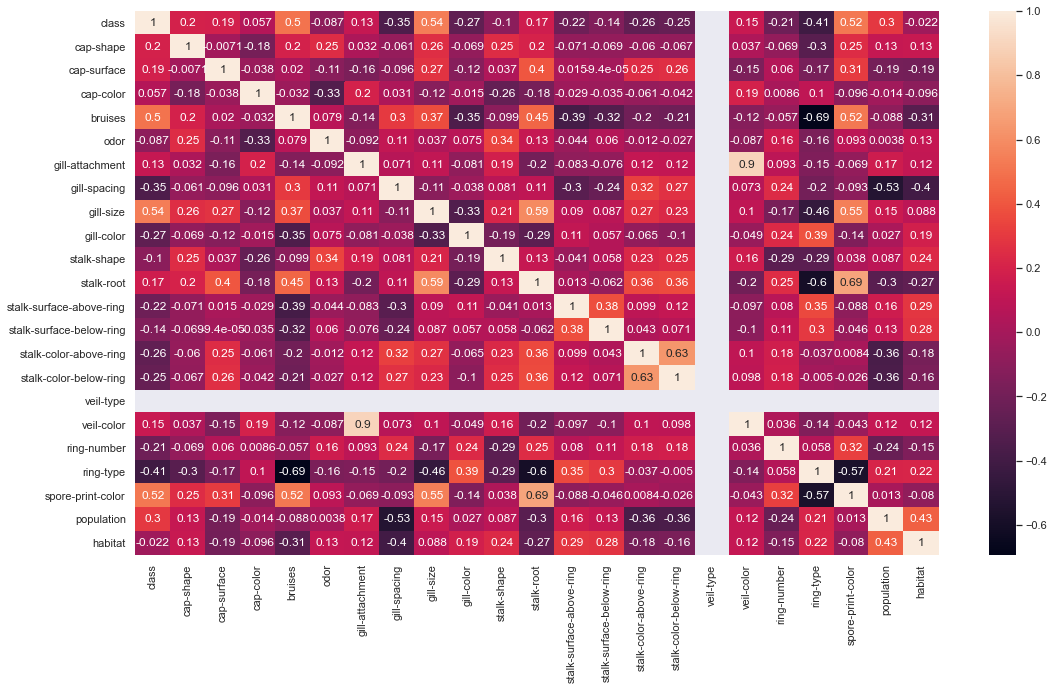

In [213]:
# correlation analysis
correlationanalysis = df4.corr()

# Resizing trick from matplotlib
plt.figure(figsize=(18,10))

# setting the annot argument to "True" to display labels
sns.heatmap(correlationanalysis,annot=True)

##### Important note: This correlation heatmap is easier to interpret than the previous one but because the method of label encoding implies a weighting on the independent variables (especially on those with more than just a few values per feature) we can't lend too much credence to these correlations. Also there are multiple values for each feature so from this heatmap we can't infer which exact feature values are the most correlated, just the entire feature as a whole. 

#### Looking at the class row of the correlation heat map it appears that 'bruises', 'gill-size', and 'spore-print-color' are the features with the largest correlation to toxicity of the mushroom.

## <u>Exploring gilled mushroom toxicity by feature groups</u>
### Looking at easy to identify features and those generally related to mushroom toxicity
##### Recall from earlier that it's generally recommended to "Avoid mushrooms with white gills, a skirt or ring on the stem, a bulbous or sack like base...or red on the cap or stem" (wildfooduk.com)

Text(0.5, 0, 'Class (toxicity)')

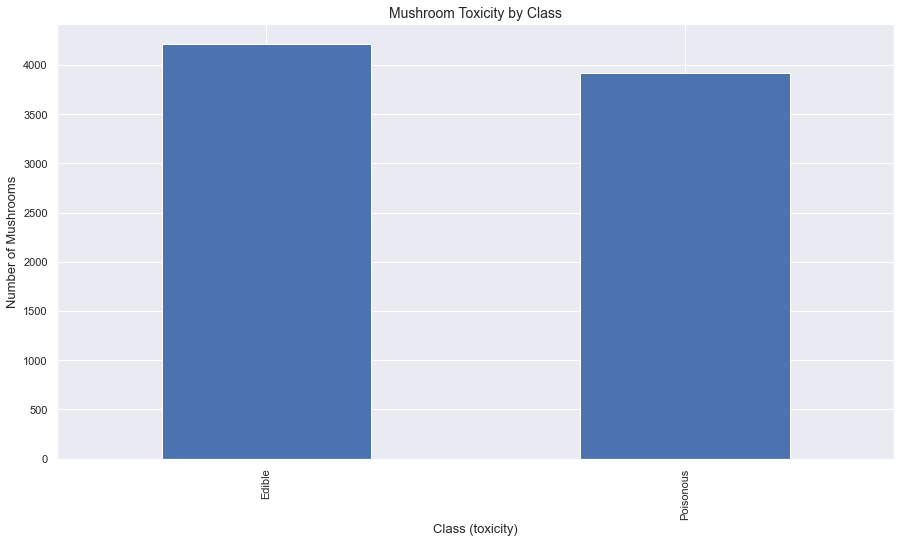

In [151]:
# What is the proportion of edible to poisonous mushrooms in the data?
df1['class'].value_counts().plot(kind='bar', figsize=(15, 8), rot=90) #bar plot class counts by group and rotate x labels 90deg
plt.title('Mushroom Toxicity by Class', fontsize=14) #set graph title and fontsize
plt.ylabel('Number of Mushrooms', fontsize=13) #set y-axis label text and fontsize
plt.xlabel('Class (toxicity)', fontsize=13) #set x-axis label text and fontsize

#### The overall mushroom data has a fairly even split between edible and poisonous mushrooms

Text(0.5, 0, 'Cap Color')

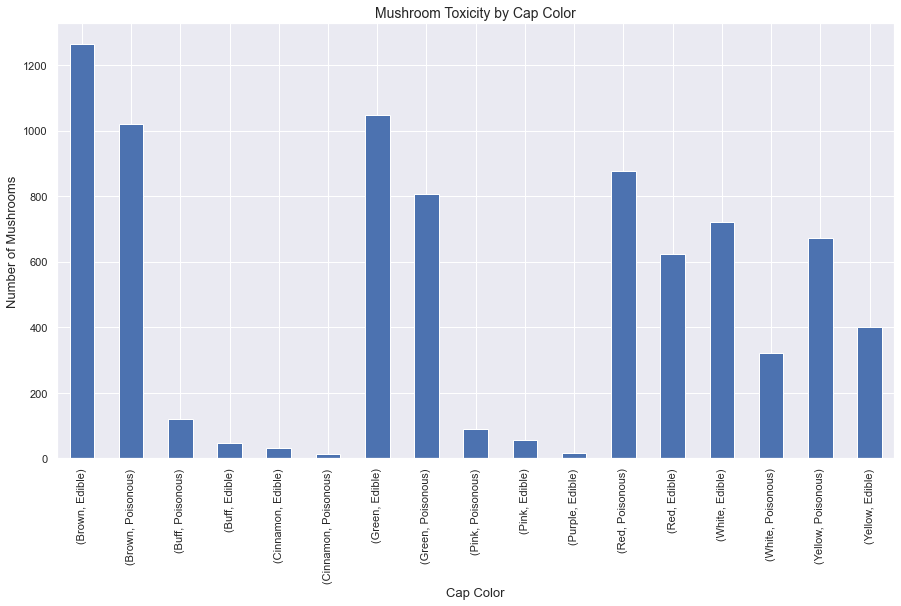

In [152]:
# Which color of mushroom caps is most likely to be poisonous?

df1.groupby('cap-color')['class'].value_counts().plot(kind='bar', figsize=(15, 8),rot=90) #bar plot class counts by group and rotate x labels 90deg
plt.title('Mushroom Toxicity by Cap Color', fontsize=14) #set graph title and fontsize
plt.ylabel('Number of Mushrooms', fontsize=13) #set y-axis label text and fontsize
plt.xlabel('Cap Color', fontsize=13) #set x-axis label text and fontsize

### Noticeable trends: 
#### There are nearly twice as many 'Red' capped gilled mushrooms that are poisonous compared to those that are edible. This aligns with the general recommendation to avoid red capped mushrooms (wildfooduk.com) 
#### For the 'White' capped gilled mushrooms - more than twice as many white capped mushrooms appear to be edible compared to those that are poisonous.

Text(0.5, 0, 'Cap Shape')

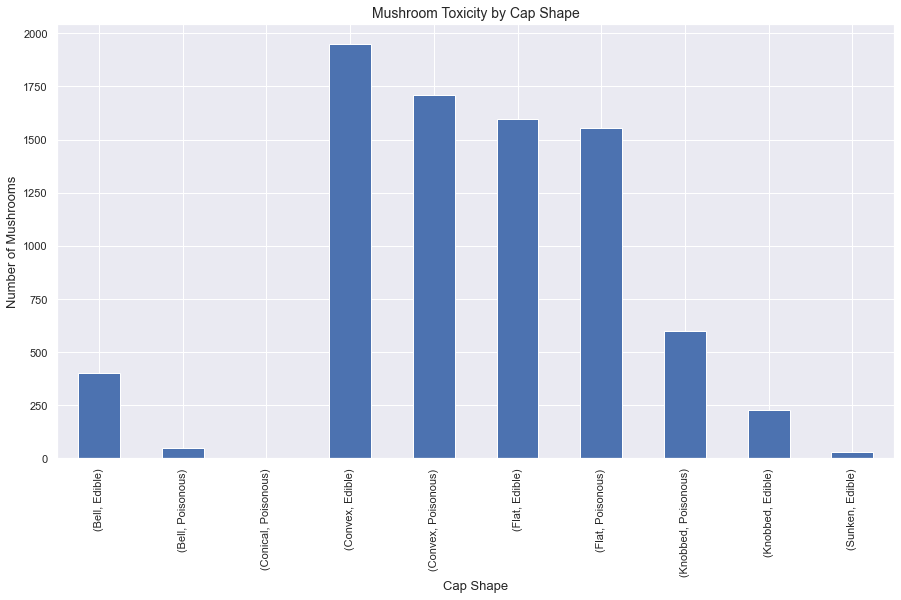

In [153]:
# Which mushroom cap shapes are most likely to indicate a poisonous mushroom?

df1.groupby('cap-shape')['class'].value_counts().plot(kind='bar', figsize=(15, 8),rot=90) #bar plot class counts by group and rotate x labels 90deg
plt.title('Mushroom Toxicity by Cap Shape', fontsize=14) #set graph title and fontsize
plt.ylabel('Number of Mushrooms', fontsize=13) #set y-axis label text and fontsize
plt.xlabel('Cap Shape', fontsize=13) #set x-axis label text and fontsize

#### Bell shaped mushrooms tend to be edible and Knobbed shaped mushrooms tend to be poisonous but there aren't enough samples to say for certain.
#### The largest number of mushrooms in this category are Convex and Flat but they have roughly an equal number of edible and poisonous

Text(0.5, 0, 'Odor')

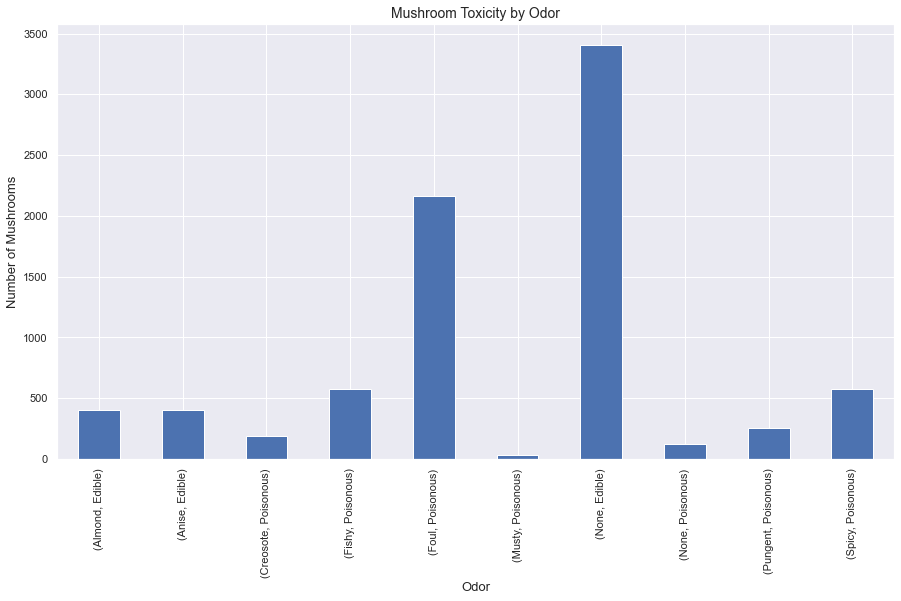

In [154]:
# Mushroom toxicity by odor

df1.groupby('odor')['class'].value_counts().plot(kind='bar', figsize=(15, 8),rot=90) #bar plot class counts by group and rotate x labels 90deg
plt.title('Mushroom Toxicity by Odor', fontsize=14) #set graph title and fontsize
plt.ylabel('Number of Mushrooms', fontsize=13) #set y-axis label text and fontsize
plt.xlabel('Odor', fontsize=13) #set x-axis label text and fontsize

### Now this is interesting! 
#### There is a large amount of foul smelling mushrooms in the data and they are ALL poisonous (approx. 3400 of them)! The Spicy and Fishy smelling mushrooms are also poisonous but there are much fewer of them overall (approx. 500).
#### There is also a large amount of mushrooms lacking a smell (odor = none) and the vast majority of them are edible!

Text(0.5, 0, 'Stalk Color Above Ring')

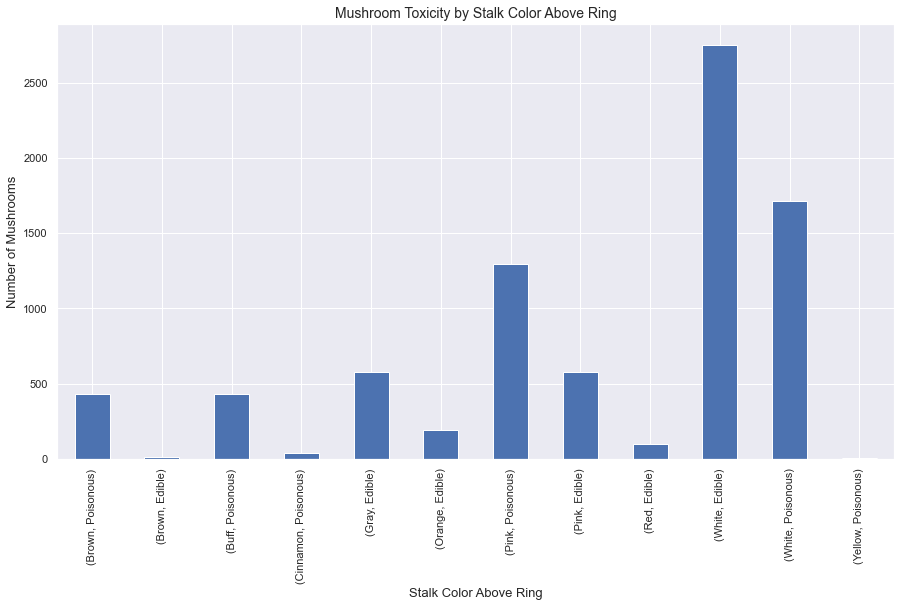

In [166]:
df1.groupby('stalk-color-above-ring')['class'].value_counts().plot(kind='bar', figsize=(15, 8),rot=90) #bar plot class counts by group and rotate x labels 90deg
plt.title('Mushroom Toxicity by Stalk Color Above Ring', fontsize=14) #set graph title and fontsize
plt.ylabel('Number of Mushrooms', fontsize=13) #set y-axis label text and fontsize
plt.xlabel('Stalk Color Above Ring', fontsize=13) #set x-axis label text and fontsize

#### There aren't any gilled mushrooms with a red stem in our dataset so we can't confirm the general rule. But interestingly mushrooms with a Pink stalk color tend to be much more poisonous than edible mushrooms.

Text(0.5, 0, 'Stalk Shape')

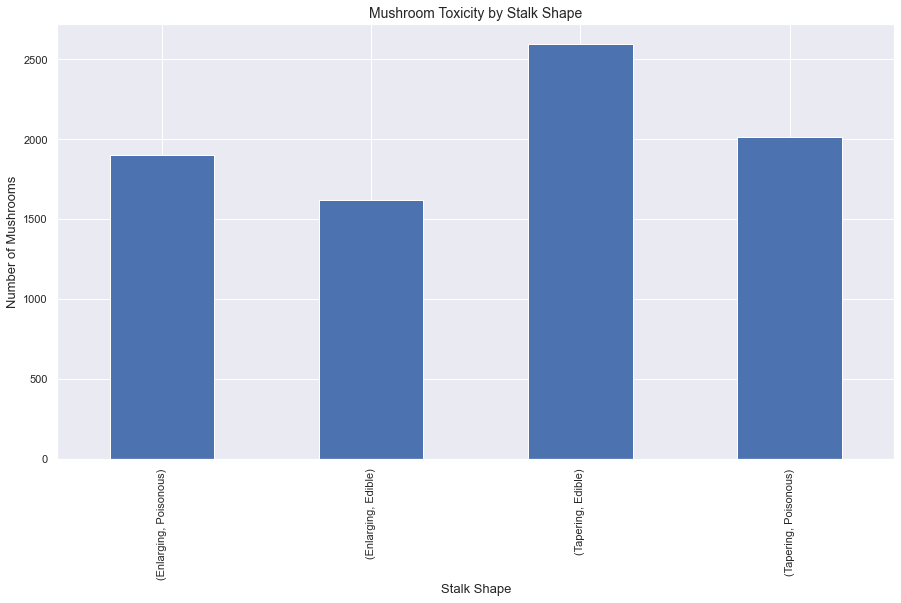

In [155]:
df1.groupby('stalk-shape')['class'].value_counts().plot(kind='bar', figsize=(15, 8),rot=90) #bar plot class counts by group and rotate x labels 90deg
plt.title('Mushroom Toxicity by Stalk Shape', fontsize=14) #set graph title and fontsize
plt.ylabel('Number of Mushrooms', fontsize=13) #set y-axis label text and fontsize
plt.xlabel('Stalk Shape', fontsize=13) #set x-axis label text and fontsize

#### For stalk shape there aren't any significant insights to be drawn from the graph except that those with an 'Enlarging' stalk shape tend to be slightly more poisonous.

Text(0.5, 0, 'Habitat')

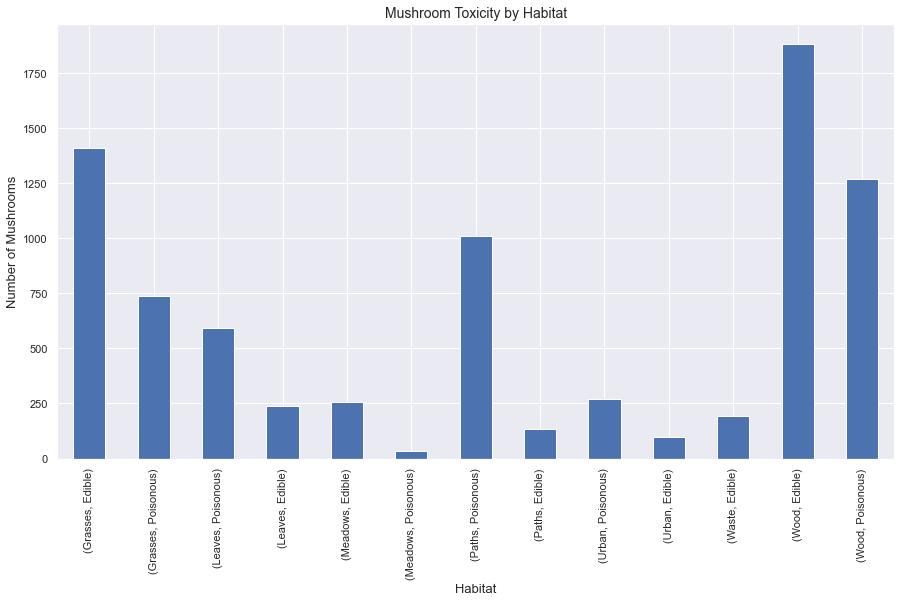

In [158]:
df1.groupby('habitat')['class'].value_counts().plot(kind='bar', figsize=(15, 8),rot=90) #bar plot class counts by group and rotate x labels 90deg
plt.title('Mushroom Toxicity by Habitat', fontsize=14) #set graph title and fontsize
plt.ylabel('Number of Mushrooms', fontsize=13) #set y-axis label text and fontsize
plt.xlabel('Habitat', fontsize=13) #set x-axis label text and fontsize

#### Knowing that we have slightly more edible than poisonous mushrooms in the overall data it's interesting to note that for the habitats of 'Leaves' and 'Paths' they contain a significantly higher proportion of poisonous mushrooms to edible mushrooms.

Text(0.5, 0, 'Bruises')

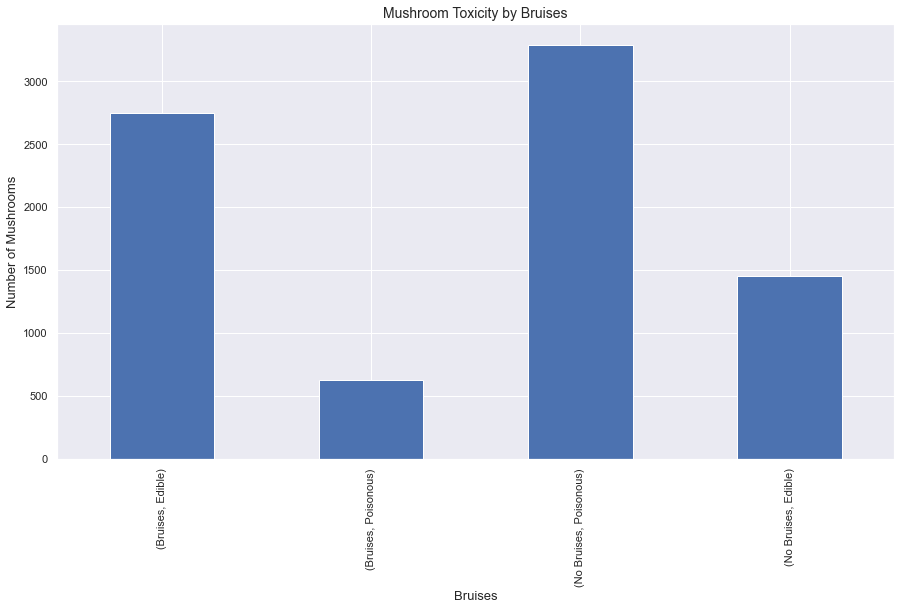

In [159]:
# Plotting mushroom toxicity by bruises
df1.groupby('bruises')['class'].value_counts().plot(kind='bar', figsize=(15, 8),rot=90) #bar plot class counts by group and rotate x labels 90deg
plt.title('Mushroom Toxicity by Bruises', fontsize=14) #set graph title and fontsize
plt.ylabel('Number of Mushrooms', fontsize=13) #set y-axis label text and fontsize
plt.xlabel('Bruises', fontsize=13) #set x-axis label text and fontsize

### We have what appears to be another interesting finding here!
#### Mushrooms with bruises are most often edible and those without bruises are most often poisonous. But who knows where the bruising came from - does it naturally bruise or has something damaged it to cause a bruise? This is an unreliable indicator; don't go eating mushrooms by this feature alone!
##### Fun fact: The blue bruising of mushrooms can be an indicator that it is a psychedelic mushroom! (source https://doubleblindmag.com/blue-bruising-mushrooms/)

Text(0.5, 0, 'Spore Print Color')

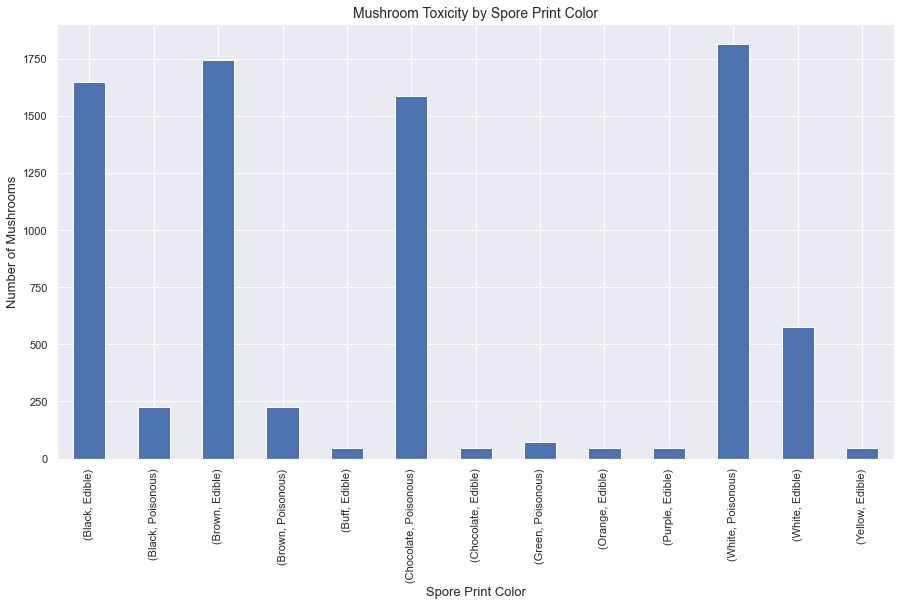

In [165]:
# Mushroom toxicity by spore print color
df1.groupby('spore-print-color')['class'].value_counts().plot(kind='bar', figsize=(15, 8),rot=90) #bar plot class counts by group and rotate x labels 90deg
plt.title('Mushroom Toxicity by Spore Print Color', fontsize=14) #set graph title and fontsize
plt.ylabel('Number of Mushrooms', fontsize=13) #set y-axis label text and fontsize
plt.xlabel('Spore Print Color', fontsize=13) #set x-axis label text and fontsize

### There are some real interestingfindings here as well:
#### Highly likely to be poisonous: Chocolate and White spore prints. 
#### Highly likely to be edible: Black and Brown spore prints

#### This is counter-ituitive to most of us because the store-bought edible mushrooms (typically  button and oyster) are usually these two colours but it's important to remember that his dataset is for gilled mushrooms which excludes the varieties of button and oyster mushrooms. It's also important to remember these colors correspond to the spores dropped from the mushroom and not to the color of the mushroom itself!

#### The visible difference between the spore print colors of chocolate and brown is so small that foragers should be careful when picking these gilled mushrooms using this feature alone as they could be either poisonous or edible and very hard to tell the difference between them!

Text(0.5, 0, 'Ring Number')

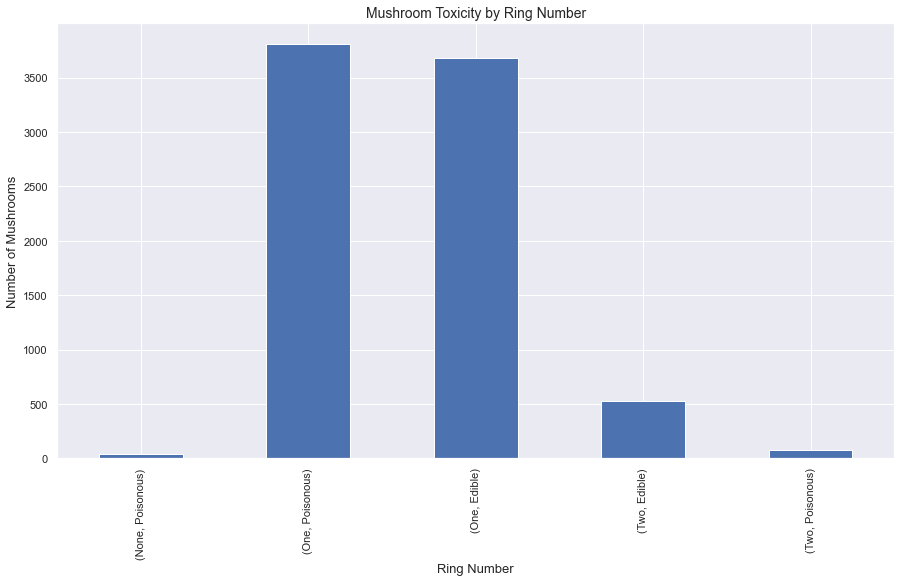

In [161]:
# Mushroom toxicity by ring number
# According to some research mushrooms having a ring around the stem tend to be poisonous
df1.groupby('ring-number')['class'].value_counts().plot(kind='bar', figsize=(15, 8),rot=90) #bar plot class counts by group and rotate x labels 90deg
plt.title('Mushroom Toxicity by Ring Number', fontsize=14) #set graph title and fontsize
plt.ylabel('Number of Mushrooms', fontsize=13) #set y-axis label text and fontsize
plt.xlabel('Ring Number', fontsize=13) #set x-axis label text and fontsize

#### For these gilled mushrooms there doesn't appear to be any significant relationship between ring number and toxicity of the mushroom, despite the general recommendation that mushrooms with rings tend to be poisonous (wildfooduk.com).

#### However it is interesting to note that the vast majority of these gilled mushrooms have one or more rings

Text(0.5, 0, 'Stalk Root Shape')

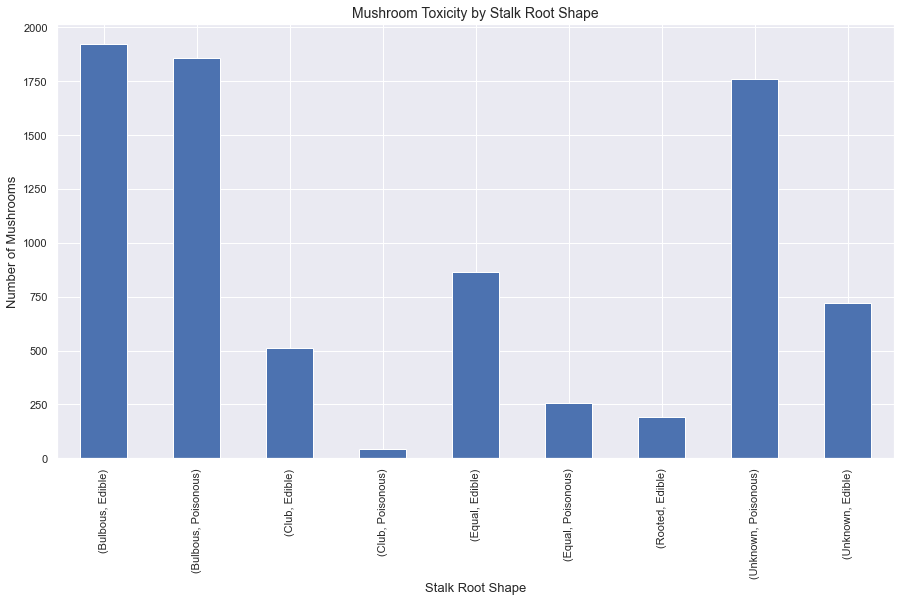

In [162]:
#Looking at how stalk-root shape corresponds to mushroom edibility
df1.groupby('stalk-root')['class'].value_counts().plot(kind='bar', figsize=(15, 8),rot=90) #bar plot class counts by group and rotate x labels 90deg
plt.title('Mushroom Toxicity by Stalk Root Shape', fontsize=14) #set graph title and fontsize
plt.ylabel('Number of Mushrooms', fontsize=13) #set y-axis label text and fontsize
plt.xlabel('Stalk Root Shape', fontsize=13) #set x-axis label text and fontsize

#### There aren't any significant findings here except that gilled mushrooms with an 'equal' shaped stalk root tend to be edible. The general recommendation to avoid mushrooms with a bulbous stalk root due to toxicity doesn't apply to this dataset of gilled mushrooms. Perhaps it is a good general recommendation when considering all species of mushrooms but that can't be confirmed from our data including only gilled mushrooms.

## <u>Exploratory Data Analysis - Summary of important points:</u>

##### Remember the data is for 23 species of gilled mushrooms, it isn't accounting for all species and types of mushrooms

#### Red cap: likely to be poisonous (nearly 2x more red cap mushrooms are poisonous than edible)
#### White cap: likely to be edible (more than 2x more white cap edible mushrooms than poisonous)
 
#### Odor-foul: ALL ARE POISONOUS! (no foul odor edible mushrooms in this dataset)
#### Odor-fishy and Odor-spicy: all are poisonous but there aren't a huge number of samples (~500 samples of each compared to the 2160 samples of foul odor mushrooms)
#### Odor-none: NEARLY ALL OF THEM ARE EDIBLE! (only 120/3408 or 3.5% of mushrooms without odor are poisonous)
 
#### Habitat-paths: nearly 10x more poisonous mushrooms than edible ones growing on paths! (~150 vs 1000)
#### Habitat-leaves: more than 2x more poisonous mushrooms than edible mushrooms growing on leaves
 
#### Spore_print-chocolate or white: Large amount of poisonous mushrooms having a chocolate or white spore print
#### Spore_print-black or brown: Large amount of edible mushrooms having a black or brown spore print

## <u>Encoding data for running machine learning models</u>
#### Label encoding for dependent variable (Class) and one-hot encoding for independent variables (all other columns)

In [14]:
df2 = df1.copy() #make a copy of the table before encoding

In [15]:
label_encoder = LabelEncoder() #define varaible for LabelEncoder from sklearn
df2['class'] = label_encoder.fit_transform(df2['class']) #label encode class column
df2['class'].head() # 1 is poisonous and 0 is edible

0    1
1    0
2    0
3    1
4    0
Name: class, dtype: int32

In [16]:
df2_independent_vars = df2.drop('class', 1) #establish the independent variables by dropping the predictor column of 'class'
df2_independent_vars.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,Convex,Smooth,Brown,Bruises,Pungent,Free,Close,Narrow,Black,Enlarging,Equal,Smooth,Smooth,White,White,Partial,White,One,Pendant,Black,Scattered,Urban
1,Convex,Smooth,Yellow,Bruises,Almond,Free,Close,Broad,Black,Enlarging,Club,Smooth,Smooth,White,White,Partial,White,One,Pendant,Brown,Numerous,Grasses
2,Bell,Smooth,White,Bruises,Anise,Free,Close,Broad,Brown,Enlarging,Club,Smooth,Smooth,White,White,Partial,White,One,Pendant,Brown,Numerous,Meadows
3,Convex,Scaly,White,Bruises,Pungent,Free,Close,Narrow,Brown,Enlarging,Equal,Smooth,Smooth,White,White,Partial,White,One,Pendant,Black,Scattered,Urban
4,Convex,Smooth,Green,No Bruises,None,Free,Crowded,Broad,Black,Tapering,Equal,Smooth,Smooth,White,White,Partial,White,One,Evanescent,Brown,Abundant,Grasses


In [17]:
#One-hot encode the independent variables using pandas get_dummies
df2_independent_vars_enc = pd.get_dummies(df2_independent_vars)
df2_independent_vars_enc.head()

,cap-shape_Bell,cap-shape_Conical,cap-shape_Convex,cap-shape_Flat,cap-shape_Knobbed,cap-shape_Sunken,cap-surface_Fibrous,cap-surface_Grooves,cap-surface_Scaly,cap-surface_Smooth,cap-color_Brown,cap-color_Buff,cap-color_Cinnamon,cap-color_Green,cap-color_Pink,cap-color_Purple,cap-color_Red,cap-color_White,cap-color_Yellow,bruises_Bruises,bruises_No Bruises,odor_Almond,odor_Anise,odor_Creosote,odor_Fishy,odor_Foul,odor_Musty,odor_None,odor_Pungent,odor_Spicy,gill-attachment_Attached,gill-attachment_Free,gill-spacing_Close,gill-spacing_Crowded,gill-size_Broad,gill-size_Narrow,gill-color_Black,gill-color_Brown,gill-color_Buff,gill-color_Chocolate,gill-color_Gray,gill-color_Green,gill-color_Orange,gill-color_Pink,gill-color_Purple,gill-color_Red,gill-color_White,gill-color_Yellow,stalk-shape_Enlarging,stalk-shape_Tapering,stalk-root_Bulbous,stalk-root_Club,stalk-root_Equal,stalk-root_Rooted,stalk-root_Unknown,stalk-surface-above-ring_Fibrous,stalk-surface-above-ring_Scaly,stalk-surface-above-ring_Silky,stalk-surface-above-ring_Smooth,stalk-surface-below-ring_Fibrous,stalk-surface-below-ring_Scaly,stalk-surface-below-ring_Silky,stalk-surface-below-ring_Smooth,stalk-color-above-ring_Brown,stalk-color-above-ring_Buff,stalk-color-above-ring_Cinnamon,stalk-color-above-ring_Gray,stalk-color-above-ring_Orange,stalk-color-above-ring_Pink,stalk-color-above-ring_Red,stalk-color-above-ring_White,stalk-color-above-ring_Yellow,stalk-color-below-ring_Brown,stalk-color-below-ring_Buff,stalk-color-below-ring_Cinnamon,stalk-color-below-ring_Gray,stalk-color-below-ring_Orange,stalk-color-below-ring_Pink,stalk-color-below-ring_Red,stalk-color-below-ring_White,stalk-color-below-ring_Yellow,veil-type_Partial,veil-color_Brown,veil-color_Orange,veil-color_White,veil-color_Yellow,ring-number_None,ring-number_One,ring-number_Two,ring-type_Evanescent,ring-type_Flaring,ring-type_Large,ring-type_None,ring-type_Pendant,spore-print-color_Black,spore-print-color_Brown,spore-print-color_Buff,spore-print-color_Chocolate,spore-print-color_Green,spore-print-color_Orange,spore-print-color_Purple,spore-print-color_White,spore-print-color_Yellow,population_Abundant,population_Clustered,population_Numerous,population_Scattered,population_Several,population_Solitary,habitat_Grasses,habitat_Leaves,habitat_Meadows,habitat_Paths,habitat_Urban,habitat_Waste,habitat_Wood
0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,1,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
3,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
4,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0


In [63]:
#let's set our X and y variables before starting the modelling
X = df2_independent_vars_enc #all features other than 'class' are the independent variables
y = df2['class'] #what we're predicting for - poisonous/edible (1/0 encoded)

In [64]:
#split the X and y data into testing and training sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1337)

## <u>Logistic regression model</u>

#### This model is a great starting point for modelling this set of categorical data to gain a better understanding of the significance of each feature in predicting mushroom toxicity.

In [174]:
# initialize logistic regression model with 3000 max iterations
lr = LogisticRegression(random_state=1337, max_iter=3000)
lr.fit(X_train, y_train)

# using the model to predict y
y_pred = lr.predict(X_test)

# evaluation
print("Accuracy Score:",accuracy_score(y_test, y_pred)) #calculate and print the logistic regression accuracy score
print("") # to space out the two print statements
print(classification_report(y_test, y_pred))

Accuracy Score: 1.0

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1042
           1       1.00      1.00      1.00       989

    accuracy                           1.00      2031
   macro avg       1.00      1.00      1.00      2031
weighted avg       1.00      1.00      1.00      2031



#### Perfect accuracy score for predicting the edible and poisonous mushroom labels with 1042 edible mushrooms and 989 poisonous mushrooms in the test set

<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

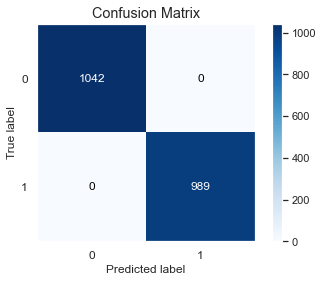

In [108]:
#Confusion matrix for logistic regression model
skplt.metrics.plot_confusion_matrix(y_test, y_pred)

#### All labels are predicted accurately according to the confusion matrix

In [66]:
# Cross-validation for logistic Regression model
print(cross_val_score(lr, X_train, y_train, cv=5))
print(np.mean(cross_val_score(lr, X_train, y_train, cv=5)))

[0.99917966 1.         1.         1.         0.99917898]
0.9996717274785787


#### The Logistic Regression model has a very strong mean cross-validation score of 0.9997! This lends some credence to our model not being overfit but in fact just being extremely strong at predicting the toxicity of mushrooms based on the provided features. 

#### Speaking of features let's look at each one of them in a feature importance analysis

In [181]:
# get feature importance
importance = lr.coef_[0] 

# summarize feature importance
for i,v in enumerate(importance): 
	print('Feature: %0d, Score: %.5f' % (i,v)) #print each feature number in order and its feature score rounded to 5 decimal places

Feature: 0, Score: 0.31222
Feature: 1, Score: 0.51142
Feature: 2, Score: -0.14906
Feature: 3, Score: -0.01843
Feature: 4, Score: -0.14501
Feature: 5, Score: -0.51118
Feature: 6, Score: -0.83888
Feature: 7, Score: 0.64545
Feature: 8, Score: -0.02287
Feature: 9, Score: 0.21626
Feature: 10, Score: -0.37725
Feature: 11, Score: 0.88305
Feature: 12, Score: -0.99249
Feature: 13, Score: -0.12831
Feature: 14, Score: 0.75398
Feature: 15, Score: -0.37196
Feature: 16, Score: 0.00340
Feature: 17, Score: 0.51420
Feature: 18, Score: -0.28466
Feature: 19, Score: 0.07353
Feature: 20, Score: -0.07357
Feature: 21, Score: -2.76058
Feature: 22, Score: -2.74937
Feature: 23, Score: 2.67040
Feature: 24, Score: 0.85331
Feature: 25, Score: 2.61558
Feature: 26, Score: 0.30071
Feature: 27, Score: -3.99161
Feature: 28, Score: 2.20815
Feature: 29, Score: 0.85337
Feature: 30, Score: -0.14657
Feature: 31, Score: 0.14653
Feature: 32, Score: 1.46755
Feature: 33, Score: -1.46759
Feature: 34, Score: -2.09883
Feature: 35,

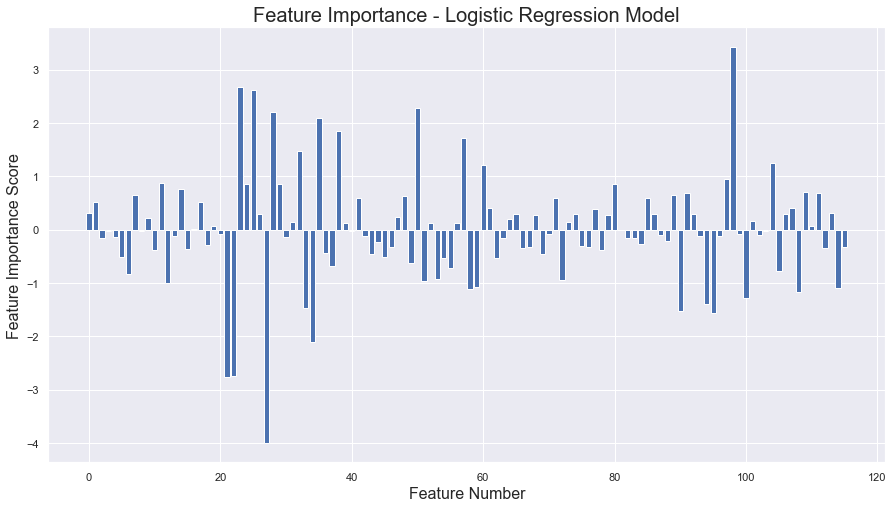

In [183]:
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.title('Feature Importance - Logistic Regression Model', fontsize=20) #set the title label and fontsize
plt.xlabel('Feature Number', fontsize=16) #set the x axis label and fontsize
plt.ylabel('Feature Importance Score', fontsize=16) #set the y axis label and fontsize
plt.gcf().set_size_inches(15, 8) #increase the table size

### <u>Logistic Regression - Feature importance analysis</u>

#### We can see that the features with the largest importance score from the linear regression model are:
#### Feature 27 (-3.99161) : a strong negative correlation and Feature 98 (3.41974) : a strong positive correlation. So Feature 27 is very strong at predicting that a mushroom is edible and Feature 98 is very strong at predicting a mushroom is poisonous.

#### What are these features? The features are labelled 0-inclusive so they correspond to the 27 and 98th column of the df2_independent_vars_enc table because the columns are also labelled 0 inclusive

In [111]:
#Let's look at the independent variable table once more
df2_independent_vars_enc.head(1)

,cap-shape_Bell,cap-shape_Conical,cap-shape_Convex,cap-shape_Flat,cap-shape_Knobbed,cap-shape_Sunken,cap-surface_Fibrous,cap-surface_Grooves,cap-surface_Scaly,cap-surface_Smooth,cap-color_Brown,cap-color_Buff,cap-color_Cinnamon,cap-color_Green,cap-color_Pink,cap-color_Purple,cap-color_Red,cap-color_White,cap-color_Yellow,bruises_Bruises,bruises_No Bruises,odor_Almond,odor_Anise,odor_Creosote,odor_Fishy,odor_Foul,odor_Musty,odor_None,odor_Pungent,odor_Spicy,gill-attachment_Attached,gill-attachment_Free,gill-spacing_Close,gill-spacing_Crowded,gill-size_Broad,gill-size_Narrow,gill-color_Black,gill-color_Brown,gill-color_Buff,gill-color_Chocolate,gill-color_Gray,gill-color_Green,gill-color_Orange,gill-color_Pink,gill-color_Purple,gill-color_Red,gill-color_White,gill-color_Yellow,stalk-shape_Enlarging,stalk-shape_Tapering,stalk-root_Bulbous,stalk-root_Club,stalk-root_Equal,stalk-root_Rooted,stalk-root_Unknown,stalk-surface-above-ring_Fibrous,stalk-surface-above-ring_Scaly,stalk-surface-above-ring_Silky,stalk-surface-above-ring_Smooth,stalk-surface-below-ring_Fibrous,stalk-surface-below-ring_Scaly,stalk-surface-below-ring_Silky,stalk-surface-below-ring_Smooth,stalk-color-above-ring_Brown,stalk-color-above-ring_Buff,stalk-color-above-ring_Cinnamon,stalk-color-above-ring_Gray,stalk-color-above-ring_Orange,stalk-color-above-ring_Pink,stalk-color-above-ring_Red,stalk-color-above-ring_White,stalk-color-above-ring_Yellow,stalk-color-below-ring_Brown,stalk-color-below-ring_Buff,stalk-color-below-ring_Cinnamon,stalk-color-below-ring_Gray,stalk-color-below-ring_Orange,stalk-color-below-ring_Pink,stalk-color-below-ring_Red,stalk-color-below-ring_White,stalk-color-below-ring_Yellow,veil-type_Partial,veil-color_Brown,veil-color_Orange,veil-color_White,veil-color_Yellow,ring-number_None,ring-number_One,ring-number_Two,ring-type_Evanescent,ring-type_Flaring,ring-type_Large,ring-type_None,ring-type_Pendant,spore-print-color_Black,spore-print-color_Brown,spore-print-color_Buff,spore-print-color_Chocolate,spore-print-color_Green,spore-print-color_Orange,spore-print-color_Purple,spore-print-color_White,spore-print-color_Yellow,population_Abundant,population_Clustered,population_Numerous,population_Scattered,population_Several,population_Solitary,habitat_Grasses,habitat_Leaves,habitat_Meadows,habitat_Paths,habitat_Urban,habitat_Waste,habitat_Wood
0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0


In [90]:
#extract the column names for Features 27 and 98 from the independent variables dataframe
df2_independent_vars_enc.iloc[0:0,27], df2_independent_vars_enc.iloc[0:0,98]

(Series([], Name: odor_None, dtype: uint8),
 Series([], Name: spore-print-color_Green, dtype: uint8))

#### So according to the logistic regression model the odor_None and spore-print-color-Green features are the most important features for predicting the toxicity of a mushroom. odor_None has the large negative coefficient (-3.99161) so it reliably predicts that if a mushroom has no smell it is very likely to be edible. The green spore-print-color is the large positive coefficient (3.41974) so it reliably predicts that if a mushroom has a green spore print it is most likely poisonous. Remember from earlier that for the dependent variable of 'class' (mushroom toxicity) a value of '1' corresponds to poisonous and '0' corresponds to edible.

#### This raises a question: are there some other mushroom odors that are moderately strong predictors of the poisonous mushrooms? Looking at the logistic regression coefficients calculated above they ranged from about -4 to +4. Lets say a coefficient of magnitude > 2 is a 'moderately strong' predictor. With features 21 through 29 corresponding to odor we can see that these features are moderately strong predictors of toxicity:

Feature: 21, Score: -2.76058 (moderately strong negative correlation)

Feature: 22, Score: -2.74937 (moderately strong negative correlation)

Feature: 23, Score: 2.67040 (moderately strong positive correlation)

Feature: 25, Score: 2.61558 (moderately strong positive correlation)

Feature: 28, Score: 2.20815 (moderately strong positive correlation)

##### What are the odor types for these features?

In [120]:
#extract the column names for Features 21, 22, 23, 25, and 28 from the independent variables dataframe
df2_independent_vars_enc.columns[21:24], df2_independent_vars_enc.columns[25], df2_independent_vars_enc.columns[28]

(Index(['odor_Almond', 'odor_Anise', 'odor_Creosote'], dtype='object'),
 'odor_Foul',
 'odor_Pungent')

#### Features with a negative correlation (they are a moderately strong predictor of 'edible'):
#### odor_Almond, odor_Anise

#### Features with a positive correlation (they are a moderately strong predictor of 'poisonous'):
#### odor_Creosote, odor_Foul, odor_Pungent

### According to the logistic regression model when identifying poisonous mushrooms it's important we make sure to avoid the Pungent, Foul, and Creosote (strong smoky) odors! These mushrooms are likely poisonous! On the other hand gilled mushrooms smelling like almond or anise are more likely to be edible!

#### Which other features have a correlation score with a magnitude greater than 2?


Feature: 34 - gill-size_Broad, Score: -2.09883 (moderately strong negative correlation)

Feature: 35 - gill-size_Narrow, Score: 2.09878 (moderately strong positive correlation)

Feature: 50 - stalk-root_Bulbous, Score: 2.28872 (moderately strong positive correlation)
##### Feature names are extracted below for reference

In [125]:
# extract column names for the features
df2_independent_vars_enc.columns[34], df2_independent_vars_enc.columns[35], df2_independent_vars_enc.columns[50]

('gill-size_Broad', 'gill-size_Narrow', 'stalk-root_Bulbous')

### Mushrooms with narrow gills tend to be poisonous and those with broad gills and/or a bulbous stalk tend to be edible. 

## <u>Decision tree model</u>

In [20]:
# initialize the decision tree model
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train) #fit the model to the training set

# using the decision tree model to predict the y value using X_test data
y_pred = dt.predict(X_test)

# accuracy score
print("Accuracy score:", accuracy_score(y_test, y_pred)) #print the accuracy score for the predicted dependent variable compared to y_test
print("")
print(classification_report(y_test, y_pred)) #print the classification report

Accuracy score: 1.0

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1042
           1       1.00      1.00      1.00       989

    accuracy                           1.00      2031
   macro avg       1.00      1.00      1.00      2031
weighted avg       1.00      1.00      1.00      2031



#### As with the logistic regression model the decision tree model also has a perfect 100% accuracy score.

In [21]:
# Cross-validation for Decision Tree model
print(cross_val_score(dt, X_train, y_train, cv=5))
print(np.mean(cross_val_score(dt, X_train, y_train, cv=5)))

[1.         1.         1.         1.         0.99917898]
0.9998357963875206


#### The cross validation score for the decision tree model is slighly less than the logistic regression at an average of 0.9998 but this is still suprisingly high!

<AxesSubplot:title={'center':'Feature Importance'}>

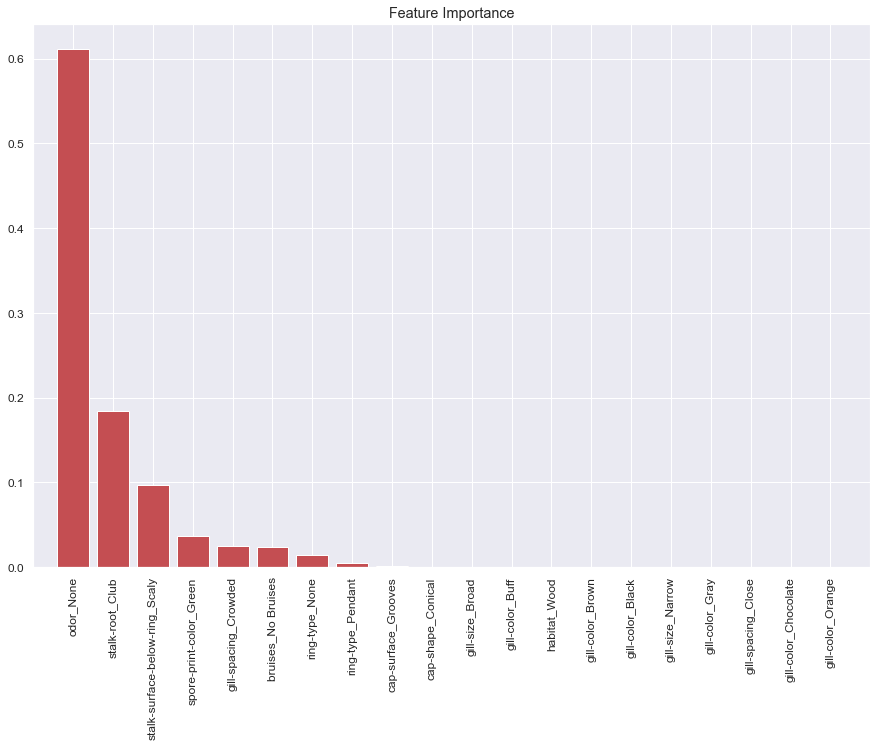

In [22]:
# Model interpretation - Decision Tree

feature_names = X.columns #assigning column names to variable 'feature_names'

#plotting the feature importances for the decision tree model
skplt.estimators.plot_feature_importances(dt, feature_names=feature_names, figsize=(15, 10), x_tick_rotation=90)

#### As with the previous logistic regression model we can see that odor_None is the most related feature.
#### There are some other features that are determined as more important features in this model compared to the logistic regression, namely stalk-root_Club and stalk-surface-below-ring_Scaly. This difference can be explained by the different methods in which the models calculate feature importance.
#### Surprisingly only 8 out of the 116 features in the independent variables that are deemed as important from the graphical analysis.

## <u>Random forest model</u>

In [113]:
# initializing the random forest model
rf = RandomForestClassifier(n_estimators=10)
rf.fit(X_train, y_train)

# using the random forest model to predict the y value using X_test data
y_pred = rf.predict(X_test)

# accuracy score
print("Accuracy score:", accuracy_score(y_test, y_pred))
print("")
print(classification_report(y_test, y_pred))

Accuracy score: 1.0

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1042
           1       1.00      1.00      1.00       989

    accuracy                           1.00      2031
   macro avg       1.00      1.00      1.00      2031
weighted avg       1.00      1.00      1.00      2031



In [114]:
# Cross-validation for random forest model
print(cross_val_score(rf, X_train, y_train, cv=5))
print(np.mean(cross_val_score(rf, X_train, y_train, cv=5)))

[1. 1. 1. 1. 1.]
1.0


<AxesSubplot:title={'center':'Feature Importance'}>

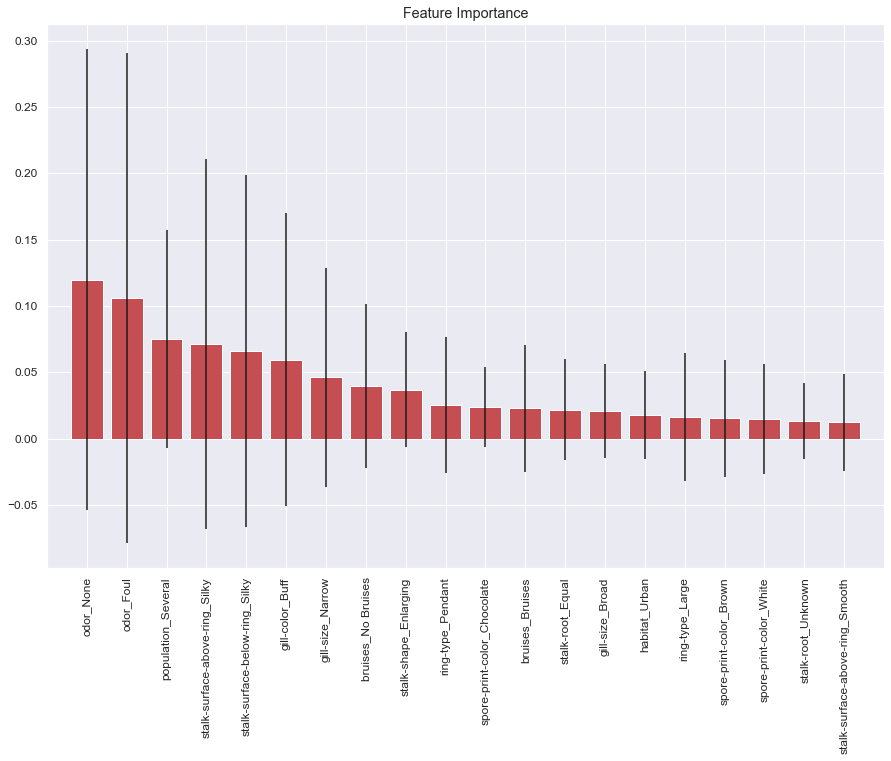

In [115]:
# Model interpretation - random forest

feature_names = X.columns # assigning column names to variable 'feature_names'

skplt.estimators.plot_feature_importances(rf, feature_names=feature_names, figsize=(15, 10), x_tick_rotation=90)

#### As with the previous two models odor_None comes out as the most important feature, but this time odor_Foul is the next most important followed by population_Several.

#### Comparing these random forest feature importances to those of the logistic regression model, the differences can be explained by the "...feature coefficients in logistic regression are calculated with all features as input in the model, while random forest calculates the importance values separately for each feature" (https://link.springer.com/article/10.1007/s42452-021-04148-9)

## <u>Support vector model</u>

In [26]:
svm = SVC()
svm.fit(X_train, y_train)

# using the SVC model to predict the y value using X_test data
y_pred = svm.predict(X_test)

# accuracy score
print("Accuracy score:", accuracy_score(y_test, y_pred))
print("")
print(classification_report(y_test, y_pred))

Accuracy score: 1.0

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1042
           1       1.00      1.00      1.00       989

    accuracy                           1.00      2031
   macro avg       1.00      1.00      1.00      2031
weighted avg       1.00      1.00      1.00      2031



#### With the support vector model we again see a 100% accuracy score indicating our model is exceptionally good at predicting if a gilled mushroom is poisonous or edible based on the testing data provided.

In [225]:
#Cross-validation for Support Vector model
print(cross_val_score(svm, X_train, y_train, cv=10))
print(np.mean(cross_val_score(svm, X_train, y_train, cv=10)))

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
1.0


#### Another cross-validation score of 1, even after increasing the folds to 10, indicating that our model is excellent (infact perfect) at predicting the mushroom class based on the other features of the mushroom.

## <u>Overall Model Analyses</u>

#### All 4 of the models are performing extremely well with 100% accuracy across the board! This seems to good to be true and brings up the concern of the models overfitting the data. Cross-validation was run on each model and the cross-validation scores were equal to or very close to 1 for each model. This helps to confirm that our model isn't overfit to the training data, in fact it's just very good at predicting the class of the mushrooms.

#### Could there by some other reason for why every model is so strong at predicting the mushroom toxicity? Looking back at the original dataset the data is described as containing "...hypothetical samples corresponding to 23 species of gilled mushrooms". This raises the concern of how the exactly these hypothetical samples were created and if there was enough variability in the samples to simulate actual real mushrooms in the wild. We should be reluctant to draw conclusions related to the predictive power of our models until we know exactly how the data was generated.

#### Future model analysis would involve excluding one or more of the highly predictive features such as 'no odor' and running the model and cross validations again to verify the integrity and predictability of the models.

## <u>Conclusions</u>

#### My hypothesis for this dataset was confirmed - there are many gilled mushroom features that can strongly predict the toxicity of the mushroom but the vast majority of the features cannot alone be used to this end. The one exception is the odor feature for which all mushrooms in this dataset (except those with no odor) could be poisonous or edible but not both.

#### Many odor feature values are moderate to strong predictors of mushroom toxicity. Across all models the feature with the largest importance is 'no-odor' in predicting that the mushroom is edible. The almond and anise odors demonstrated a moderate negative correlation to mushroom toxicity and therefore are moderately strong predictors that a mushroom is edible. It's worth noting again that unlike other features, each odor type (except 'none') corresponded specifcally to 'poisonous' or 'edible' but not to both which can help to explain the stronger correlation of this feature.

#### The pungent, foul, and creosote (strong smoky) odors are moderately strong predictors of poisonous mushrooms! (from Logistic Regression model) 

#### Among spore print colors the green spore print had the greatest feature importance in predicting a mushroom being poisonous. It's worth noting that this was with a low sample size of 74 green spore prints. Suprisingly to a less significant extent the chocolate and white spore prints represented a large number of poisonous mushrooms and the black and brown spore prints represented a large amount of edible mushrooms. This was clearly seen in the exploratory analysis but wasn't reflected as strongly in the modelling feature analysis.

#### From the exploratory analysis it was observed that a much larger proportion of mushrooms grown on paths and leaves were poisonous compared to those grown on wood and grasses which were more often edible.

#### Some features were weaker predictors of mushroom toxicity but still significant; Mushrooms with narrow gills tend to be poisonous and those with broad gills and/or a bulbous stalk tend to be edible.

#### Real-world data is needed from these same species in the dataset and also from different species to be able to make reliable predictions of mushroom toxicity in the real world. 

## <u>Ethical Concerns</u>

#### This data analysis and its predictive models are not to be used to guide mushroom consumption in the real world as they are only based on hypothetical data.

#### Seeing as mushrooms are neither plant nor animal and can establish huge networks underground that seem to communicate with their environment who really knows if they are sentient and would be opposed to us picking them out of the ground for the purpose of classification and consumption?

## <u>Fun facts:</u>

#### Habitat - mushrooms are grown by cultivators in a wide range of mediums from mulch and logs, to coffee grounds and even pizza boxes. Apparently the grease makes for a great food source and the cardboard is a great growth medium for the mycelium network.  

#### About 120,000 species of fungi have been identified as of 2018 but researchers estimate the total number of species of fungi that exist could be between 2.2 and 3.8 million (https://www.lanl.gov/museum/news/newsletter/2018/01/fungi.php) 

### <u>References</u>

Dataset: 
https://www.kaggle.com/uciml/mushroom-classification

Original dataset from UCI machine learning archive:
https://archive.ics.uci.edu/ml/datasets/mushroom

Juno College Data Analytics bootcamp course notes

Mushroom anatomy:
https://rrcultivation.com/blogs/mn/mushroom-anatomy-caps-stems

Spore prints:
https://namyco.org/spore_prints.php

Identifying poisonous mushrooms:
https://www.wildfooduk.com/articles/how-to-tell-the-difference-between-poisonous-and-edible-mushrooms/

Categorical data info:
https://www.datacamp.com/community/tutorials/categorical-data

Categorical data transformation for ML:
https://towardsdatascience.com/understanding-feature-engineering-part-2-categorical-data-f54324193e63

Feature importance interpretation:
https://machinelearningmastery.com/calculate-feature-importance-with-python/

Overfitting anaylsis and learning curves:
https://machinelearningmastery.com/overfitting-machine-learning-models/
https://machinelearningmastery.com/learning-curves-for-diagnosing-machine-learning-model-performance/
https://scikit-learn.org/stable/auto_examples/model_selection/plot_learning_curve.html

Paper on comparing feature importances between linear (eg. logistic regression) and non-linear models (eg. random forest):
https://link.springer.com/article/10.1007/s42452-021-04148-9

Number of mushroom species worldwide:
https://www.lanl.gov/museum/news/newsletter/2018/01/fungi.php